In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set_style('whitegrid')

# Input dataframes

In [2]:
games_df_part1 = pd.read_csv('data/esea_meta_demos.part1.csv')
games_df_part2 = pd.read_csv('data/esea_meta_demos.part2.csv')

kills_df_part1 = pd.read_csv('data/esea_master_kills_demos.part1.csv')
kills_df_part2 = pd.read_csv('data/esea_master_kills_demos.part2.csv')

damage_df_part1 = pd.read_csv('data/esea_master_dmg_demos.part1.csv')
damage_df_part2 = pd.read_csv('data/esea_master_dmg_demos.part2.csv')

grenades_df_part1 = pd.read_csv('data/esea_master_grenades_demos.part1.csv')
grenades_df_part2 = pd.read_csv('data/esea_master_grenades_demos.part2.csv')

map_df = pd.read_csv('data/map_data.csv', index_col=0)
grenades_events_df = pd.read_csv('data/mm_grenades_demos.csv', index_col=0)
weapon_events_df = pd.read_csv('data/mm_master_demos.csv', index_col=0)

In [3]:
grenades_events_df.drop(columns=['file', 'att_team', 'vic_team', 'vic_id', 'att_id'], inplace=True)

In [4]:
grenades_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366098 entries, 0 to 275
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   map              366098 non-null  object 
 1   round            366098 non-null  int64  
 2   start_seconds    366098 non-null  float64
 3   seconds          366098 non-null  float64
 4   end_seconds      366098 non-null  float64
 5   att_side         366098 non-null  object 
 6   vic_side         59240 non-null   object 
 7   hp_dmg           366098 non-null  int64  
 8   arm_dmg          366098 non-null  int64  
 9   is_bomb_planted  366098 non-null  bool   
 10  bomb_site        23107 non-null   object 
 11  hitbox           59240 non-null   object 
 12  nade             366098 non-null  object 
 13  winner_team      366098 non-null  object 
 14  winner_side      366098 non-null  object 
 15  att_rank         366098 non-null  int64  
 16  vic_rank         59240 non-null   float64
 17 

In [5]:
games_df = pd.concat([games_df_part1, games_df_part2])
del games_df_part1
del games_df_part2
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377629 entries, 0 to 161709
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   file           377629 non-null  object 
 1   map            377629 non-null  object 
 2   round          377629 non-null  int64  
 3   start_seconds  377589 non-null  float64
 4   end_seconds    377589 non-null  float64
 5   winner_team    377628 non-null  object 
 6   winner_side    377628 non-null  object 
 7   round_type     377629 non-null  object 
 8   ct_eq_val      377629 non-null  int64  
 9   t_eq_val       377629 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 31.7+ MB


In [6]:
kills_df = pd.concat([kills_df_part1, kills_df_part2])
del kills_df_part1
del kills_df_part2
kills_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2742646 entries, 0 to 1173168
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   tick             int64  
 3   seconds          float64
 4   att_team         object 
 5   vic_team         object 
 6   att_side         object 
 7   vic_side         object 
 8   wp               object 
 9   wp_type          object 
 10  ct_alive         int64  
 11  t_alive          int64  
 12  is_bomb_planted  bool   
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 274.6+ MB


In [7]:
# Dataframe: damage
damage_df = pd.concat([damage_df_part1, damage_df_part2])
del damage_df_part1
del damage_df_part2
damage_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10538182 entries, 0 to 4546084
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   tick             int64  
 3   seconds          float64
 4   att_team         object 
 5   vic_team         object 
 6   att_side         object 
 7   vic_side         object 
 8   hp_dmg           int64  
 9   arm_dmg          int64  
 10  is_bomb_planted  bool   
 11  bomb_site        object 
 12  hitbox           object 
 13  wp               object 
 14  wp_type          object 
 15  att_id           int64  
 16  att_rank         int64  
 17  vic_id           int64  
 18  vic_rank         int64  
 19  att_pos_x        float64
 20  att_pos_y        float64
 21  vic_pos_x        float64
 22  vic_pos_y        float64
dtypes: bool(1), float64(5), int64(8), object(9)
memory usage: 1.8+ GB


In [8]:
grenades_df = pd.concat([grenades_df_part1, grenades_df_part2])
del grenades_df_part1
del grenades_df_part2
grenades_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5246458 entries, 0 to 2256397
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   seconds          float64
 3   att_team         object 
 4   vic_team         object 
 5   att_id           int64  
 6   vic_id           float64
 7   att_side         object 
 8   vic_side         object 
 9   hp_dmg           int64  
 10  arm_dmg          int64  
 11  is_bomb_planted  bool   
 12  bomb_site        object 
 13  hitbox           object 
 14  nade             object 
 15  att_rank         int64  
 16  vic_rank         float64
 17  att_pos_x        float64
 18  att_pos_y        float64
 19  nade_land_x      float64
 20  nade_land_y      float64
 21  vic_pos_x        float64
 22  vic_pos_y        float64
dtypes: bool(1), float64(9), int64(5), object(8)
memory usage: 925.6+ MB


In [9]:
value_counts = kills_df['vic_side'].value_counts()
percentages = value_counts / len(kills_df) * 100
percentages.round(2)

vic_side
Terrorist           50.54
CounterTerrorist    49.46
Name: count, dtype: float64

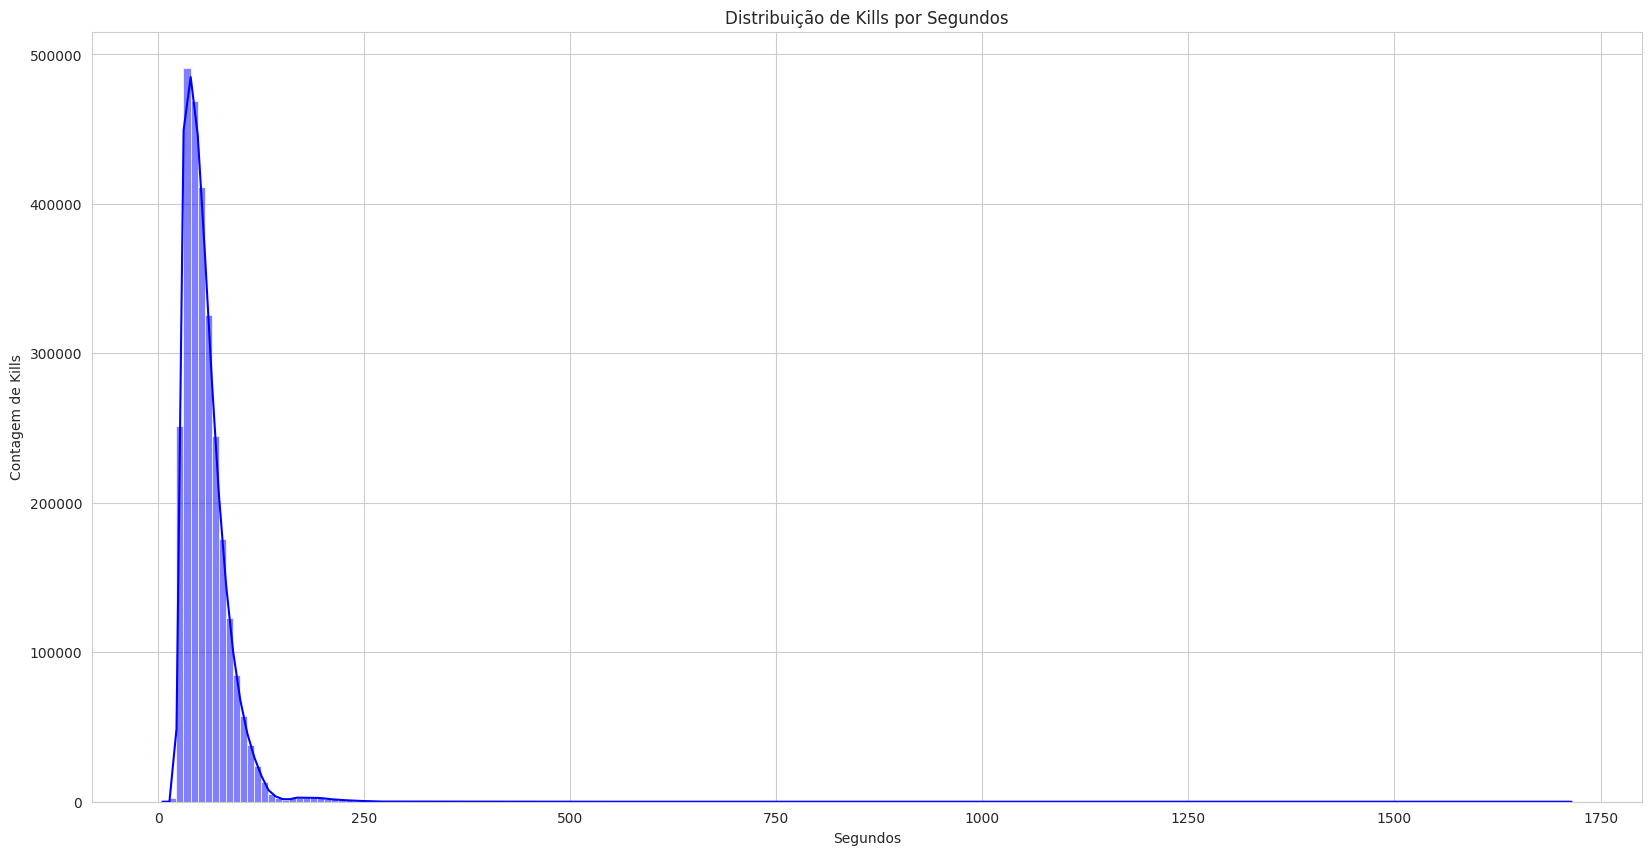

In [10]:
# Ajustando o tamanho da figura
plt.figure(figsize=(20, 10))

# Criando o histograma
sns.histplot(kills_df['seconds'], bins=200, kde=True, color='blue')

# Adicionando títulos e rótulos
plt.title('Distribuição de Kills por Segundos')
plt.xlabel('Segundos')
plt.ylabel('Contagem de Kills')

# Exibindo o gráfico
plt.show()

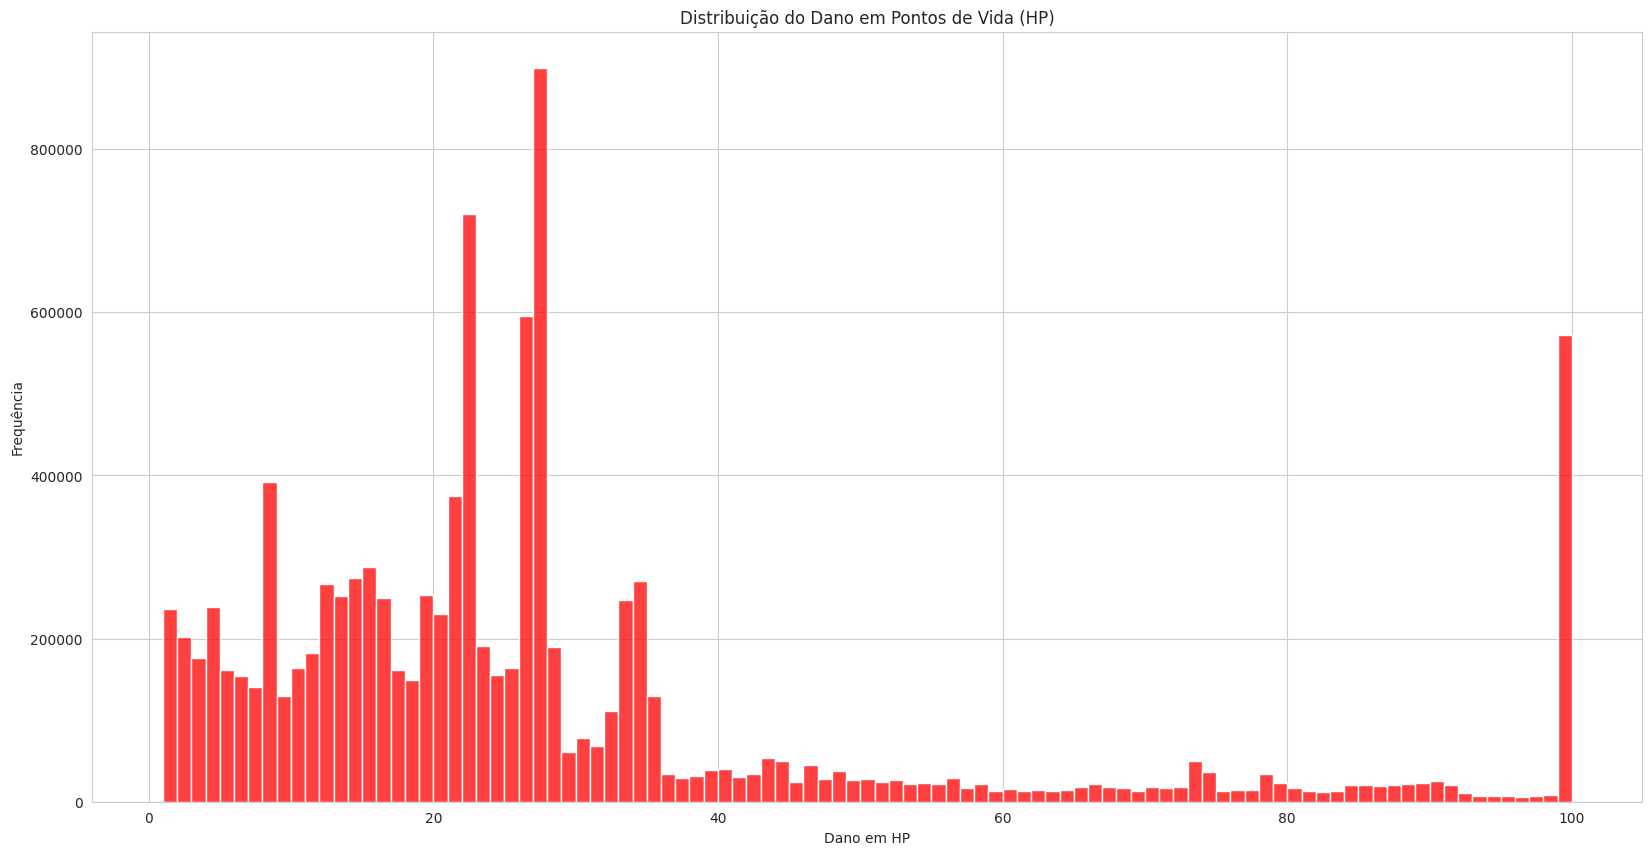

In [11]:
# Ajustando o tamanho da figura
plt.figure(figsize=(20, 10))


# Criando o histograma com uma largura de bin específica
sns.histplot(damage_df['hp_dmg'], binwidth=1, color='red')

# Adicionando títulos e rótulos
plt.title('Distribuição do Dano em Pontos de Vida (HP)')
plt.xlabel('Dano em HP')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

In [12]:
# Supondo que você tenha o pandas dataframe 'weapon_events_summary' carregado
weapon_events_summary = weapon_events_df.groupby(['wp', 'att_side']).size().reset_index(name='Total')

# Crie o gráfico
fig = px.bar(weapon_events_summary, x='wp', y='Total', color='att_side',
            #  color_discrete_map={'Terrorist': 'red', 'Counter-Terrorist': 'blue'},
             labels={'wp': 'Weapon', 'Total': 'Total'},
             title='Weapon Events Summary')

# Ajuste o layout
fig.update_layout(xaxis_tickangle=-90)

# Remova a legenda de cores
fig.update_traces(showlegend=True)

# Exiba o gráfico
fig.show()

In [13]:
# Group by Hitbox and Gun, then summarize Hits
grouped_data = weapon_events_df.groupby(['hitbox', 'wp_type']).size().reset_index(name='Hits')
# Ordenar os dados por 'Hits' em ordem decrescente
grouped_data = grouped_data.sort_values(by='Hits', ascending=False)
# Filter Hits > 20 and Hitbox != 'Generic'
filtered_data = grouped_data[(grouped_data['Hits'] > 20) & (grouped_data['hitbox'] != 'Generic')]

# Plot
fig = px.bar(filtered_data, x='hitbox', y='Hits', color='wp_type', 
             labels={'hitbox': 'Hitbox', 'Hits': 'Hits', 'wp_type': 'Gun'},
             title='Weapon Hits per Hitbox',
             barmode='group')

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

In [14]:
import pandas as pd
import plotly.express as px

# Supondo que você já tem seu dataframe weapon_events

# Group by Hitbox and Gun, then summarize Hits
grouped_data = weapon_events_df.groupby(['hitbox', 'att_side']).size().reset_index(name='Hits')

# Filter Hits > 20 and Hitbox != 'Generic'
filtered_data = grouped_data[(grouped_data['Hits'] > 20) & (grouped_data['hitbox'] != 'Generic')]

# Plot
fig = px.bar(filtered_data, x='hitbox', y='Hits', color='att_side', 
            #  labels={'hitbox': 'Hitbox', 'Hits': 'Hits', 'att_side': 'Gun'},
             title='Weapon Hits per Hitbox',
             barmode='group')

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

In [15]:
# Assuming weapon_events is your DataFrame and 'round_type' is one of its columns
round_type_counts = weapon_events_df['round_type'].value_counts().reset_index()
round_type_counts.columns = ['Round_Type', 'Count']

# Creating a bar chart with Plotly Express
fig = px.bar(round_type_counts, 
             x='Round_Type', 
             y='Count', 
             title='Event Count by Round Type',
             labels={'Count': 'Count', 'Round_Type': 'Round Type'},
             color='Round_Type',  # This assigns a unique color to each round type
             )

# Improving the presentation a bit
fig.update_layout(xaxis_title='Round Type',
                  yaxis_title='Event Count',
                  coloraxis_showscale=False)

# Displaying the chart
fig.show()


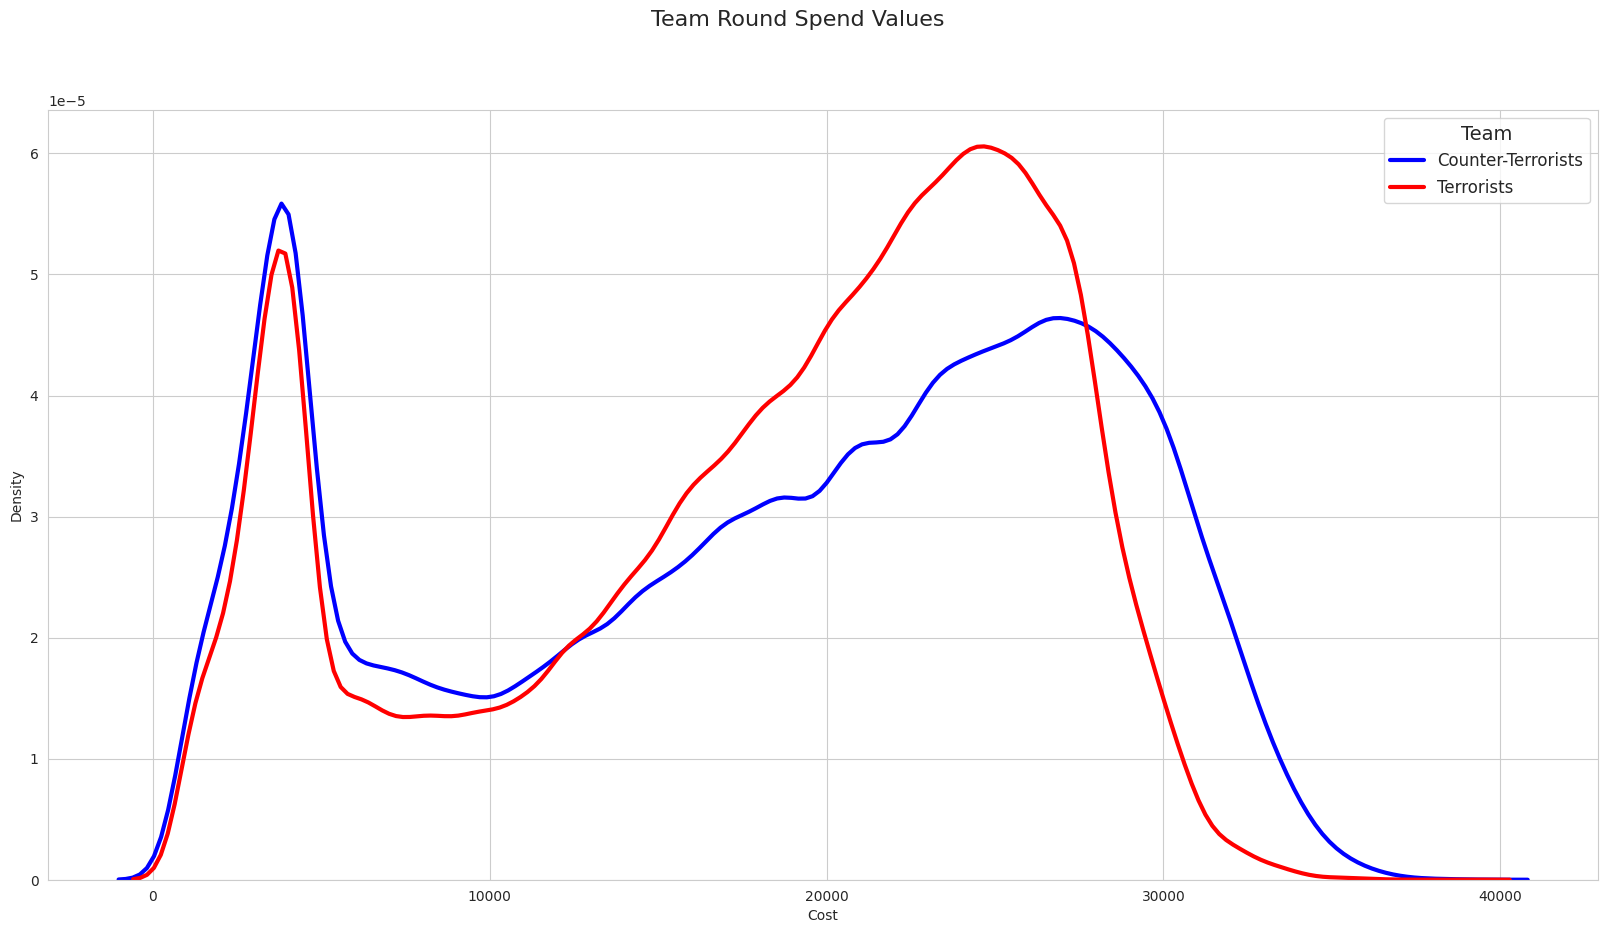

In [16]:
# Adjusting the size of the figure
fig = plt.figure(figsize=(20, 10))

# Plotting the KDE plot for Counter-Terrorists with label
sns.kdeplot(weapon_events_df['ct_eq_val'], label='Counter-Terrorists', linewidth=3, color='blue')

# Plotting the KDE plot for Terrorists with label and red color
sns.kdeplot(weapon_events_df['t_eq_val'], label='Terrorists', linewidth=3, color='red')

# Adding a legend
plt.legend(title='Team', title_fontsize='14', fontsize='12')

# Adding a title
plt.suptitle("Team Round Spend Values", fontsize=16)

# Setting x-axis label
plt.xlabel('Cost')

# Displaying the plot
plt.show()

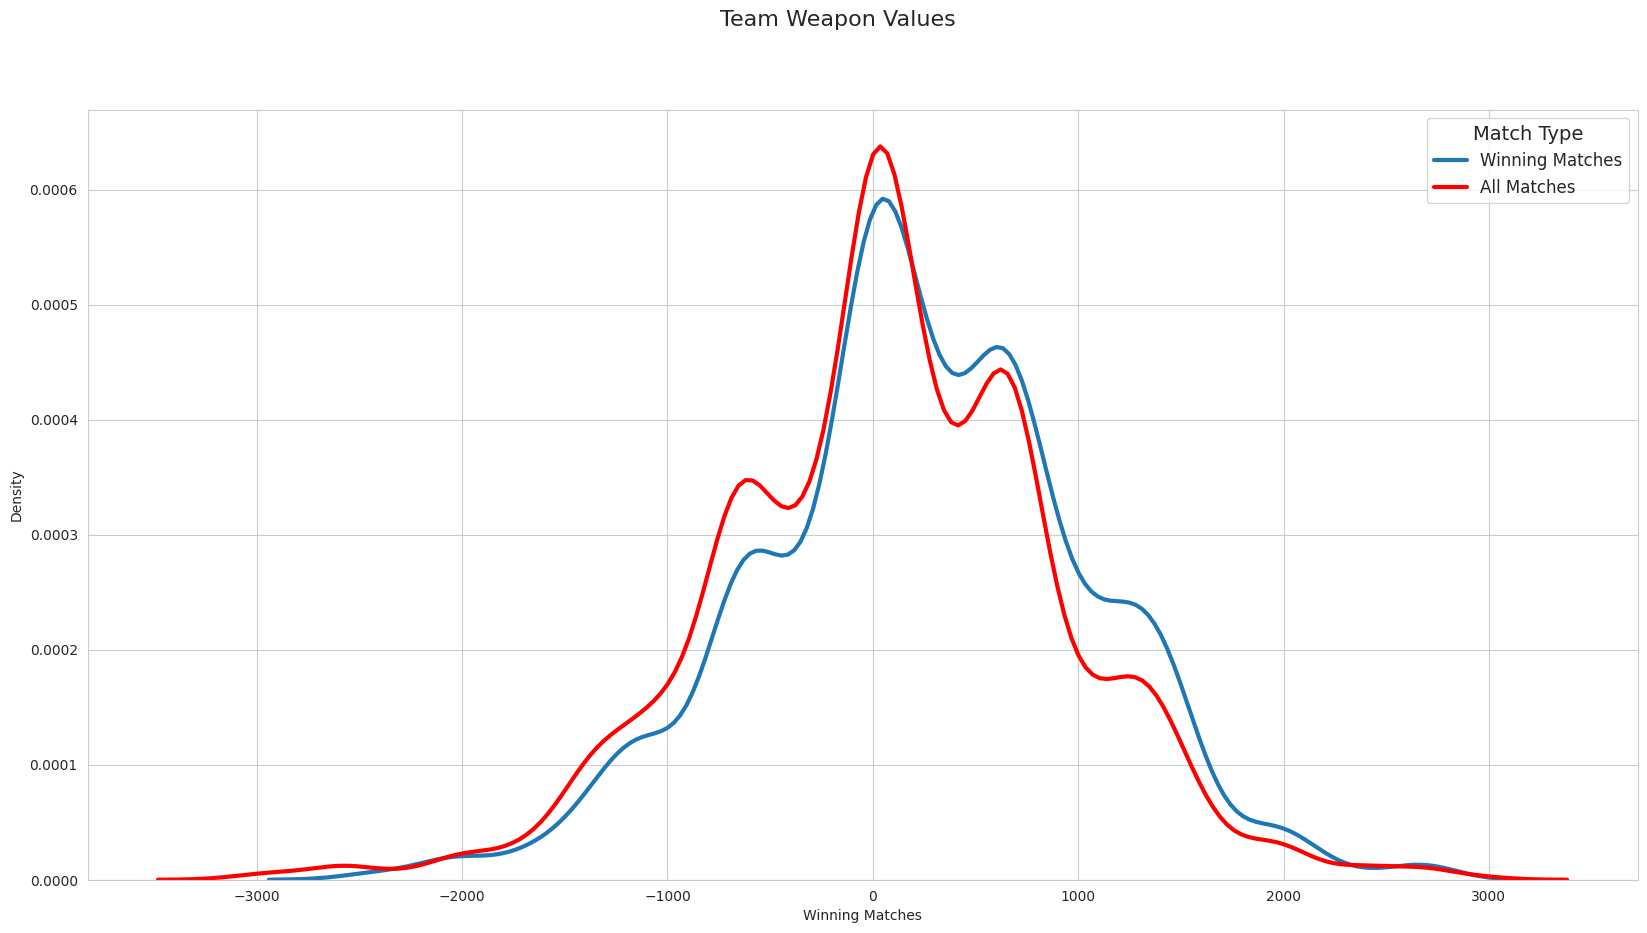

In [17]:
# Definindo o tamanho da figura
fig = plt.figure(figsize=(20, 10))

match_level_data = weapon_events_df.groupby('file').head()

# Plotando os KDE plots com nome e grossura das linhas, e atribuindo uma legenda
sns.kdeplot(match_level_data.query('winner_side == "CounterTerrorist"').pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('Winning Matches'), label='Winning Matches', linewidth=3)
sns.kdeplot(match_level_data.pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('All Matches'), label='All Matches', linewidth=3, color='red')

# Adicionando uma legenda
plt.legend(title='Match Type', title_fontsize='14', fontsize='12')

# Adicionando um título
plt.suptitle("Team Weapon Values", fontsize=16)

# Exibindo o gráfico
plt.show()


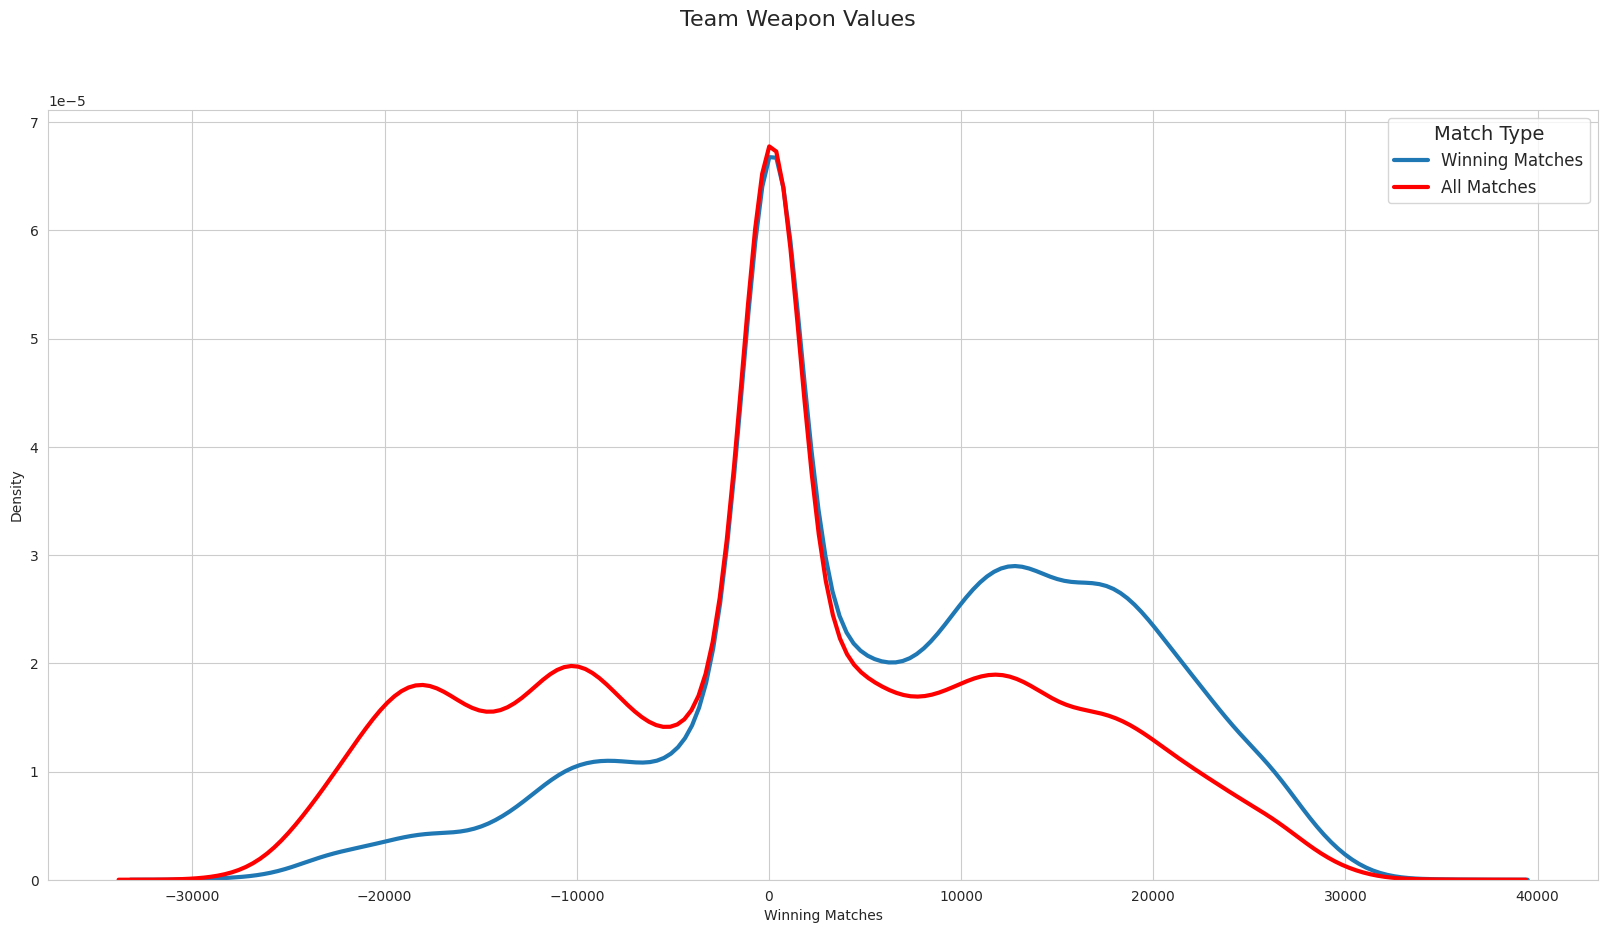

In [29]:
# Definindo o tamanho da figura
fig = plt.figure(figsize=(20, 10))

match_level_data = games_df.groupby('file').head()

# Plotando os KDE plots com nome e grossura das linhas, e atribuindo uma legenda
sns.kdeplot(match_level_data.query('winner_side == "CounterTerrorist"').pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('Winning Matches'), label='Winning Matches', linewidth=3)
sns.kdeplot(match_level_data.pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('All Matches'), label='All Matches', linewidth=3, color='red')

# Adicionando uma legenda
plt.legend(title='Match Type', title_fontsize='14', fontsize='12')

# Adicionando um título
plt.suptitle("Team Weapon Values", fontsize=16)

# Exibindo o gráfico
plt.show()
